## **Praktikum 2**
Klasifikasi SVM Pada Data Citra
dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi'
 'Tony Blair']
5
(964, 62, 47)


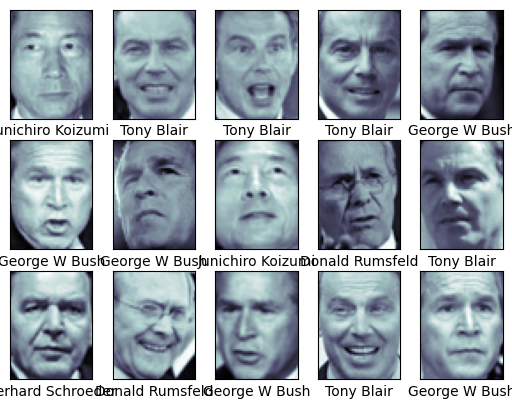

In [6]:
# contoh wajah yang digunakan
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [8]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 29.2 s
Wall time: 11.3 s
{'svc__C': 1, 'svc__gamma': 0.005}
0.8755172413793103


prediksi label untuk data testing

In [10]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

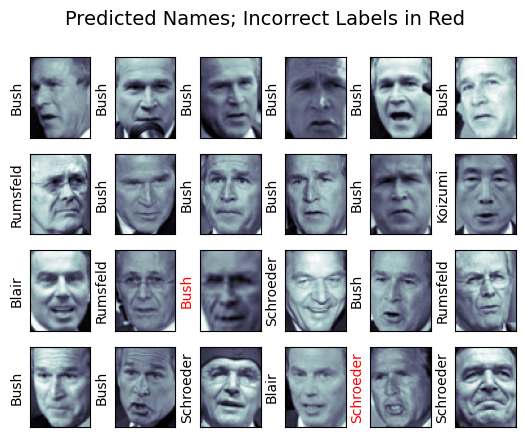

In [11]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [12]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.97      0.89      0.93        35
    George W Bush       0.93      0.96      0.95       130
Gerhard Schroeder       0.88      0.85      0.86        26
Junichiro Koizumi       0.92      0.86      0.89        14
       Tony Blair       0.89      0.92      0.90        36

         accuracy                           0.93       241
        macro avg       0.92      0.89      0.91       241
     weighted avg       0.93      0.93      0.92       241



Text(113.92222222222219, 0.5, 'predicted label')

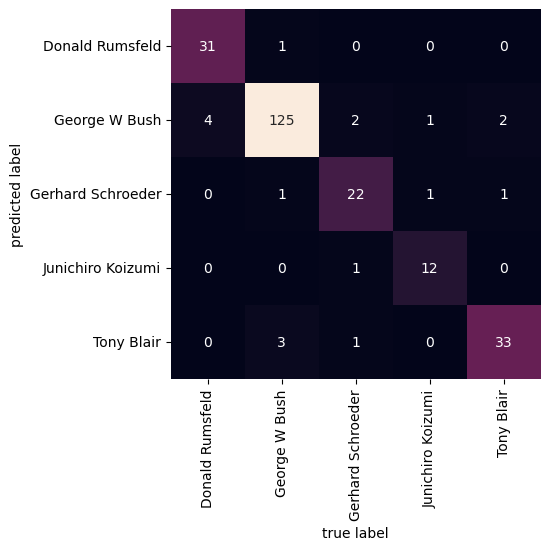

In [14]:
# bentuk confusion matrix
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')